In [1]:
import pandas as pd

df = pd.read_pickle("UK.pkl")

df.head()

,InvoiceNo,StockCode,Description
1,536365,71053,WHITE METAL LANTERN
5,536365,22752,SET 7 BABUSHKA NESTING BOXES
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,22633,HAND WARMER UNION JACK
8,536366,22632,HAND WARMER RED POLKA DOT


In [2]:
transactions = df.groupby('InvoiceNo')['Description'].apply(list).reset_index(name='Items')
transactions_list = transactions['Items'].tolist()

In [3]:
from setuptools import distutils
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

frequent_items = apriori(df_transactions, min_support=0.01, use_colnames=True)
print(frequent_items)

rules = association_rules(frequent_items, metric="lift", min_threshold=1)
print(rules)

      support                                           itemsets
0    0.012182                           (10 COLOUR SPACEBOY PEN)
1    0.010781                  (12 MESSAGE CARDS WITH ENVELOPES)
2    0.015166                    (12 PENCIL SMALL TUBE WOODLAND)
3    0.017359              (12 PENCILS SMALL TUBE RED RETROSPOT)
4    0.016628                      (12 PENCILS SMALL TUBE SKULL)
..        ...                                                ...
878  0.013704  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...
879  0.010354  (WOODEN STAR CHRISTMAS SCANDINAVIAN, WOODEN TR...
880  0.012304  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...
881  0.011268  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...
882  0.010111  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...

[883 rows x 2 columns]
                                           antecedents  \
0                    (60 CAKE CASES VINTAGE CHRISTMAS)   
1                  (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
2                (SET 

In [4]:
# and the frequent itemsets that has the most items
frequent_items['num_items'] = frequent_items['itemsets'].apply(lambda x: len(x))
print("Count of frequent itemsets with more than 1 item:", frequent_items[frequent_items['num_items'] > 1].shape[0])
print("Count of frequent itemsets with more than 2 items:", frequent_items[frequent_items['num_items'] > 2].shape[0])
print("Count of frequent itemsets with more than 3 items:", frequent_items[frequent_items['num_items'] > 3].shape[0])
print("Frequent itemsets with the most items:")
print(frequent_items[frequent_items['num_items'] == frequent_items['num_items'].max()])

Count of frequent itemsets with more than 1 item: 297
Count of frequent itemsets with more than 2 items: 53
Count of frequent itemsets with more than 3 items: 3
Frequent itemsets with the most items:
      support                                           itemsets  num_items
880  0.012304  (REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...          4
881  0.011268  (LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...          4
882  0.010111  (LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG...          4


In [5]:
print("Top 10 lift association rules:")
print(rules.sort_values(by='lift', ascending=False).head(10))

Top 10 lift association rules:
                   antecedents                consequents  antecedent support  \
149        (HERB MARKER THYME)     (HERB MARKER ROSEMARY)            0.010903   
148     (HERB MARKER ROSEMARY)        (HERB MARKER THYME)            0.011024   
146      (HERB MARKER PARSLEY)        (HERB MARKER THYME)            0.010842   
147        (HERB MARKER THYME)      (HERB MARKER PARSLEY)            0.010903   
145     (HERB MARKER ROSEMARY)      (HERB MARKER PARSLEY)            0.011024   
144      (HERB MARKER PARSLEY)     (HERB MARKER ROSEMARY)            0.010842   
143         (HERB MARKER MINT)     (HERB MARKER ROSEMARY)            0.011207   
142     (HERB MARKER ROSEMARY)         (HERB MARKER MINT)            0.011024   
447   (REGENCY TEA PLATE PINK)  (REGENCY TEA PLATE GREEN)            0.011268   
446  (REGENCY TEA PLATE GREEN)   (REGENCY TEA PLATE PINK)            0.013826   

     consequent support   support  confidence       lift  leverage  \
149    

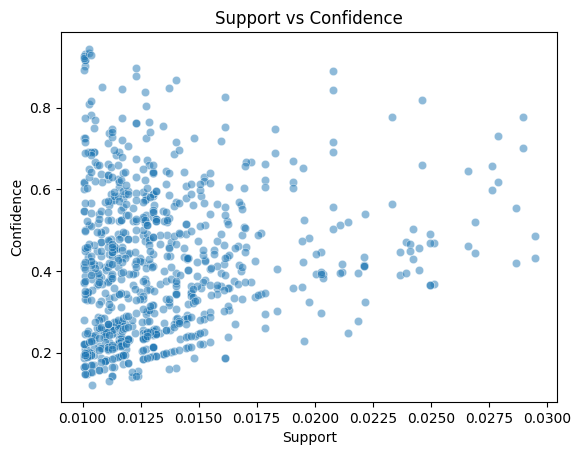

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=rules["support"], y=rules["confidence"], alpha=0.5)
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence")
plt.show()

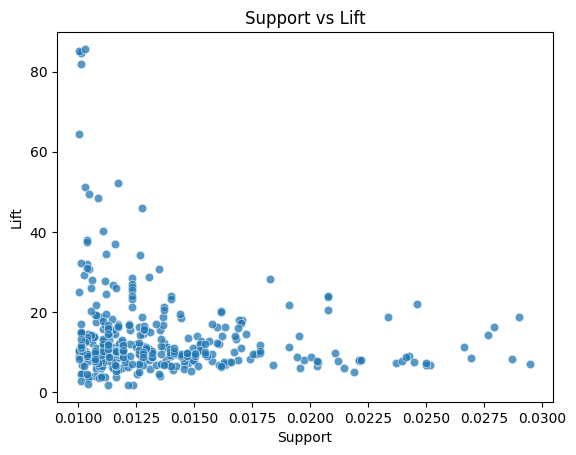

In [7]:
sns.scatterplot(x=rules["support"], y=rules["lift"], alpha=0.5)
plt.xlabel("Support")
plt.ylabel("Lift")
plt.title("Support vs Lift")
plt.show()